Tesla is an American electric vehicle company whose aim is to accelerate the world’s transition towards sustainable energy. A few days back the rise in the stock prices of Tesla made Elon Musk the richest person in the world. Predicting stock prices is a great use case of machine learning,

Predicting Stock prices is a great use case of machine learning both for financial and time series analysis. Tesla has been in the eyes of the world for a long time now as governments of so many countries all over the world are supporting the vision of Tesla. I am using  Facebook Prophet model for the task of stock price prediction of Tesla.

The dataset that I will be using here has been downloaded from yahoo finance.

Let’s see how to predict the stock prices of Tesla with Machine Learning using Python. Here I will start by importing the necessary Python libraries and the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Tesla Stock Price Prediction with Machine Learning\TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-05,681.059998,685.299988,667.340027,670.940002,670.940002,21901900
1,2021-05-06,680.760010,681.020020,650.000000,663.539978,663.539978,27784600
2,2021-05-07,665.799988,690.000000,660.219971,672.369995,672.369995,23469200
3,2021-05-10,664.900024,665.049988,627.609985,629.039978,629.039978,31392400
4,2021-05-11,599.239990,627.099976,595.599976,617.200012,617.200012,46503900


Before moving forward let’s visualize the “Close” column in the dataset which represents close prices of each day:

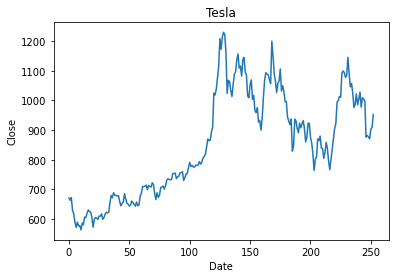

In [2]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

We only need two columns from this dataset (Date and Close), so let’s create a new DataFrame with only these two columns:

In [3]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

As we are using the Facebook prophet model here for predicting the stock prices of Tesla so we need to rename the columns:

In [4]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

So we have prepared the dataset for the Facebook prophet model, now let’s predict the stock prices of Tesla:

In [5]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\SHREE\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
613,2023-04-30,942.400832,369.362385,1526.741105
614,2023-05-01,887.986952,313.903739,1471.009739
615,2023-05-02,881.271245,312.277935,1465.708187
616,2023-05-03,885.635570,313.936401,1472.136758
617,2023-05-04,877.913284,295.143221,1486.863318


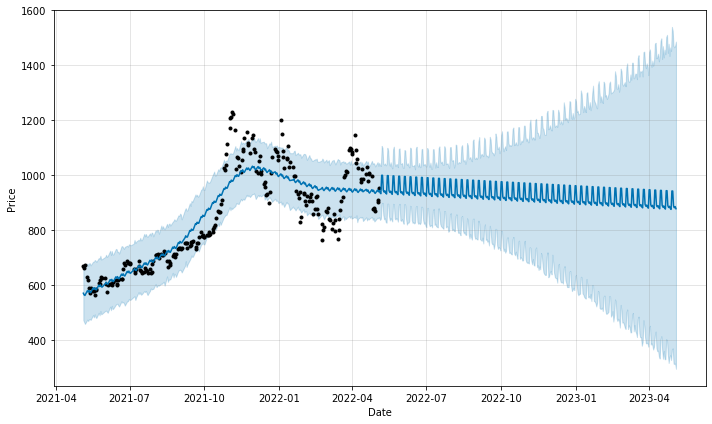

In [6]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

## Conclusion

It seems like Tesla’s stock prices will decrease in the coming future if they don’t come up with a new idea of representing their vision. This may be possible as other companies have also started manufacturing electric vehicles at a very low price as compared to Tesla.